<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/sklearn_regression_02_regression_lineaire_multiple_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Regression models with scikit-Learn</h1></center>
<center><h2>Multiple linear regression</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

### Context and objective

>The objective of this exercise is to familiarize yourself with the concept of linear regression **multiple**.<br>
> Remember that the usual multiple linear regression model is as follows:
> $$y_i = β_0+β_1x_{i,1}+β_2x_{i,2}+⋯+β_px_{i,p}+ε_i = β_0+ \sum_{j=1}^{p} β_jx_{i,j} + ε_i $$
> Where:
>> * yi is a quantitative variable continues to explain (or dependent variable).
>>
>>
>> * x1,…,xp are explanatory continuous quantitative variables.
>>
>>
>> * The εi are terms of random normal law error in zero hope and standard deviation σ.
>
> We will use in this exercise the same data as in the previous year to build a model for forecasting the price of certain cars from technical characteristics of these.<br>
> Now this prediction will be done using several explanatory variables, and by selecting those which seem the most relevant.

<hr style="border-width:2px;border-color:#75DFC1">
<center><h3>Data preparation</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">

* **(a)** Run the following cell to import the packages necessary for the exercise.


In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns

* **(b)** Read the `'automobiles.csv'` file in a dataframe called **`df`**.


In [2]:
url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/"
df = pd.read_csv(url+'automobiles.csv')

>When faced with a predictive modeling task, there is often more than one variable in the dataset that can help explain the behavior of the target variable.<br>
> It is therefore recommended to include more explanatory variables in a linear regression model by simply including more columns in the dataframa transmitted to the model learning function.

* **(c)** Extract from the DataFrame **DF** The price of cars in a variable **Target**, and the rest of the columns in **Data**.


* **(d)** Separate the data into a learning set **(X_train,y_train)** and a test set **(X_test,y_test)** containing 20% of the total data.
> *NB: Add `random_state = 789` for the reproducibility of the results*


In [3]:
data = df.drop('price', axis=1)
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=789)

<hr style="border-width:2px;border-color:#75DFC1">
<center><h3>First model</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">

* **(a)** Instantiate an **lr** regressor of the LinearRegression class.

* **(b)** Fit the model to the training set **X_train** and **y_train**.


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

* **(c)** Display the intercept and the coefficients of each variable estimated by the model.


In [5]:
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'estimated value': coeffs}, index=feats)

,estimated value
intercept,-70752.205581
symboling,-262.392066
normalized-losses,17.242125
wheel-base,219.828965
length,-121.571050
width,1015.009738
height,64.833358
curb-weight,3.376475
engine-size,36.031349
bore,-1934.639379


* **(d)** Display the model (R²) of the model on the learning sample.


* **(e)** Display the score obtained by cross validation thanks to the function **cross_val_score()**.


In [6]:
print('Model coefficient of determination: :', lr.score(X_train, y_train))
print('Coefficient of determination obtained by CV :', cross_val_score(lr,X_train,y_train).mean())

Model coefficient of determination: : 0.8602484988040267
Coefficient of determination obtained by CV : 0.7461252521200685


>The scores obtained on the learning sample are correct.<br>
>The model fits the data well, but may be overfitted. <br>
> The decrease in the R² coefficient during cross-validation assessment does indeed suggest a problem of overfitting.

* **(f)** Display the model score on the test set.


In [7]:
lr.score(X_test, y_test)

0.7785099153073732

* **(g)** Store the model predictions for X_test in **pred_test** and display the scatter plot between **pred_test** and **y_test** in a graph, adding the line with equation $y = x$.<br>

If the predictions are correct, the points should be close to this right.


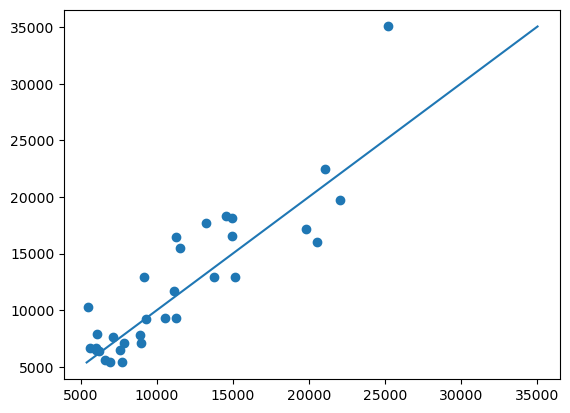

In [8]:
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

>Linear regression is based, among other things, on two hypotheses on ** errors **: homoscedasticity and normality.<br>
>We do not have errors but residues, which are the errors observed.<br>
> In addition, the study of residues makes it possible to ensure compliance with these hypotheses.
>
> A first simple graphic representing the residues as a function of the target variable allows you to make an opinion on the homoscedasticity of the residues, which should be scattered in the graphic at random around the right $ y = 0 $, without apparent structure.

*** (h)** Calculate the adjusted values ​​(**pred_train**) then the residues (**residus**) of the model.


*** (i)** Show the cloud cloud representing the residues according to the values ​​of **y_train**.


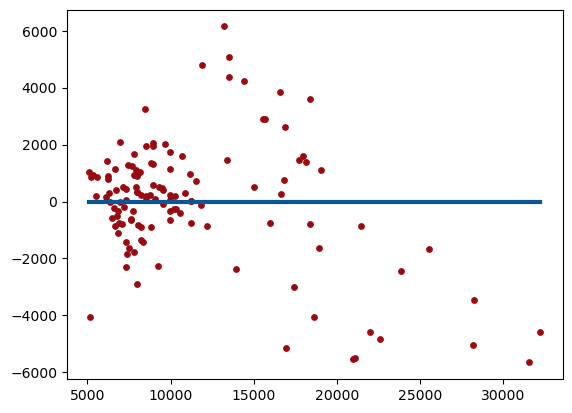

In [9]:
pred_train = lr.predict(X_train)
residus = pred_train - y_train

plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

>The points are distributed uniformly around the right of equation $ y = 0 $ because the average of the residues is around 0.<br>
> However, a structure is seen in their distribution. Indeed, the lower the price, the closer the points are the right. The more the price increases, the more the residues move away from the center and become negative.
>
>The function ** `Probplot` ** of ** scipy.stats ** allows you to display a quantile-quantile or (Q-Q Plot) diagram which makes it possible to assess the relevance of the adjustment of a given distribution to a theoretical model (often a reduced Gaussian law).<br>
> Thus the normality of the residues (once centered reduced) is easily validated; If the points are aligned on the first bisector, it is because the distribution of residues probably follows a normalized Gaussian law.

*** (j)** Center Reduce residues in a vector called **Residus_norm**.


*** (K)** Show the QQ-Plot by applying the function `Stats.Probplot` to*residus_norm*.


*** (l)** Add the argument `Plot = Plt` to be able to display it with MatPlotlib thanks to the` Plt.show () `control.


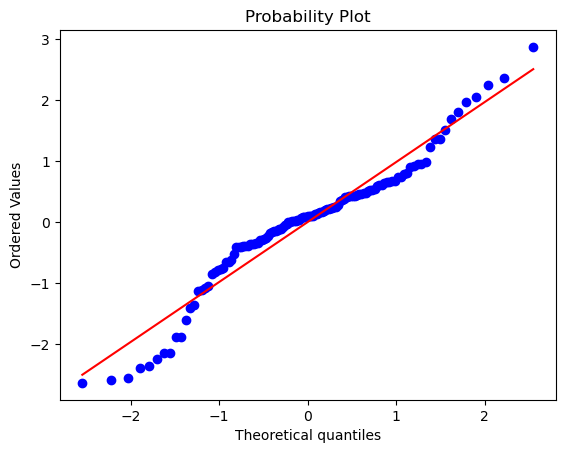

In [10]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)

plt.show();

> The normality hypothesis is plausible, the points aligning approximately along the right.
>
>Our model works but can be further improved. Especially because all the variables present were included in the construction of the model.<br>
> Now, variables with little relationship with the variable to be explained, or a certain number of explanatory variables too correlated with each other can lead to a drop in results. It is also necessary to be wary of digital variables with very few unique values, such as **symboling** because they often act more like categorical variables.
>
> Colinearity between explanatory variables can cause poor adjustment of the model, poorly estimated coefficients and over-learning during a linear regression.
>
>The attribute ** `Corr` ** Pandas data allows the table of correlations to be returned between each pair of dataframa variables.<br>
>The function ** `Heatmap` ** of ** Seaborn ** (abridged in ** SNS **) allows the values ​​of a table to be displayed as a function of a color scale.<br>
> The argument `Annot = True` allows you to display the different values ​​on the graph, the` Center argument makes it possible to indicate the central value for the color scale, and the CMAP` argument allows you to choose a color palette different from that by default.

*** (m)** Show a heatmap of correlations between each pair of **`df`** variables, with 0 for center and use the palette` `rdbu_r' '.


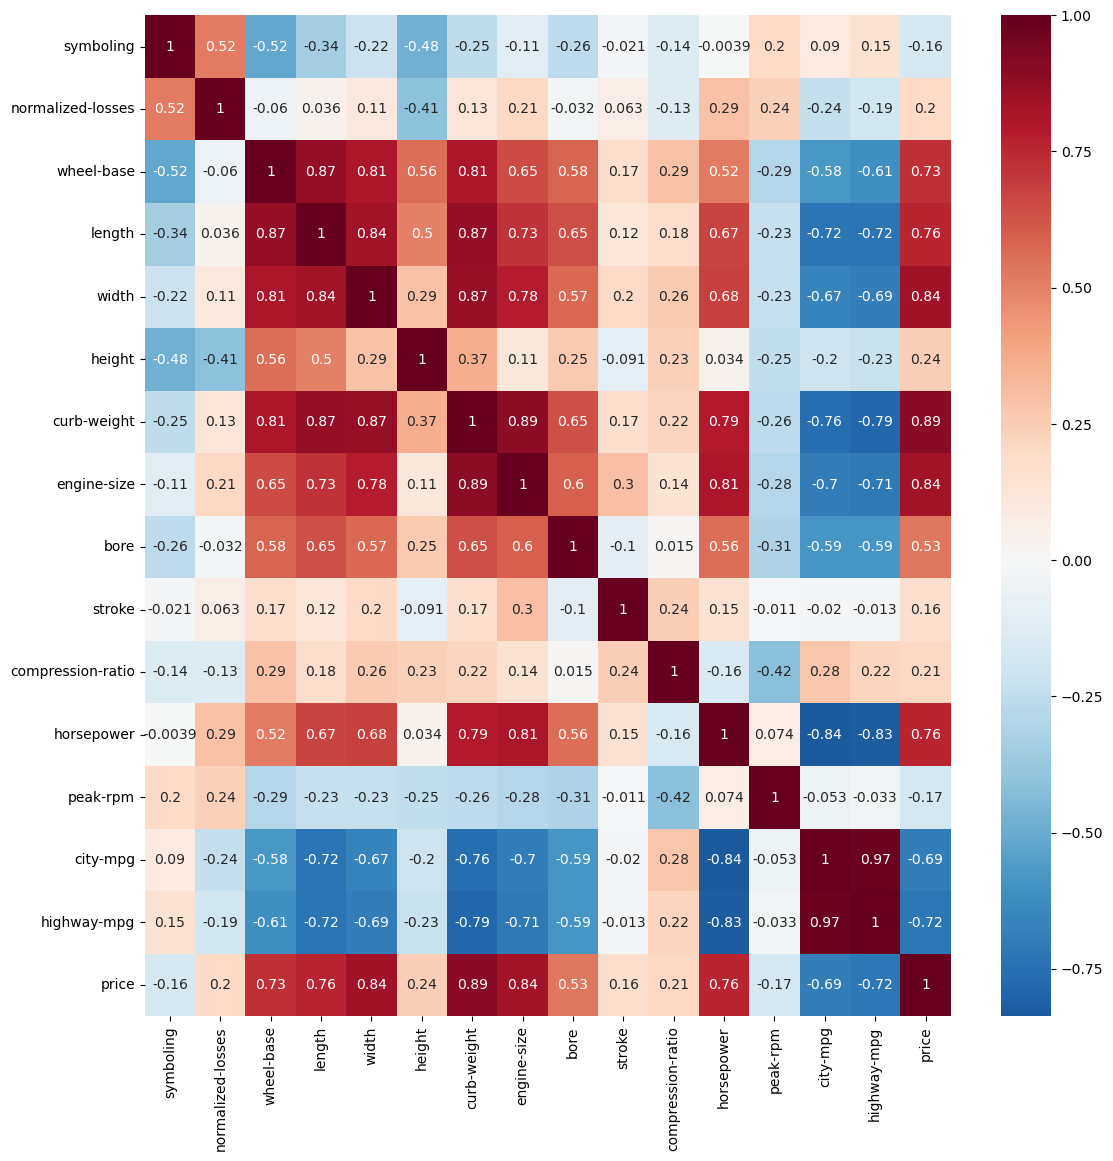

In [11]:
plt.figure(figsize=(13, 13))

sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", center=0);

> Beaucoup de variables sont hautement corrélées entre elles (corrélation >80), others are very little correlated with the variable ** 'Price' **.<br>
> It is therefore recommended to **simplify** our model by choosing only the variables having a **concrete correlation** with the target variable **'price'**. Among the groups of variables very correlated with each other, we only retain **that which is the most correlated** with the variable **'Price**.
>
> To validate the linearity hypothesis, it must also be verified that the relationships between the different attributes and the variable 'Price' have a linear aspect. To do this, we can use the **`pairplot`** function of*Seaborn*which displays for a given dataframa, a matrix of cloud clouds between each pair of variables it contains.

*** (n)** Show a matrix of the points of points between the variables `'Curb-weight'',` 'Horsepower'', `'Hightway-Pg'',` Height' ', `' bore' ',`' 'Width'' and `'price' 'of **` Df`**.


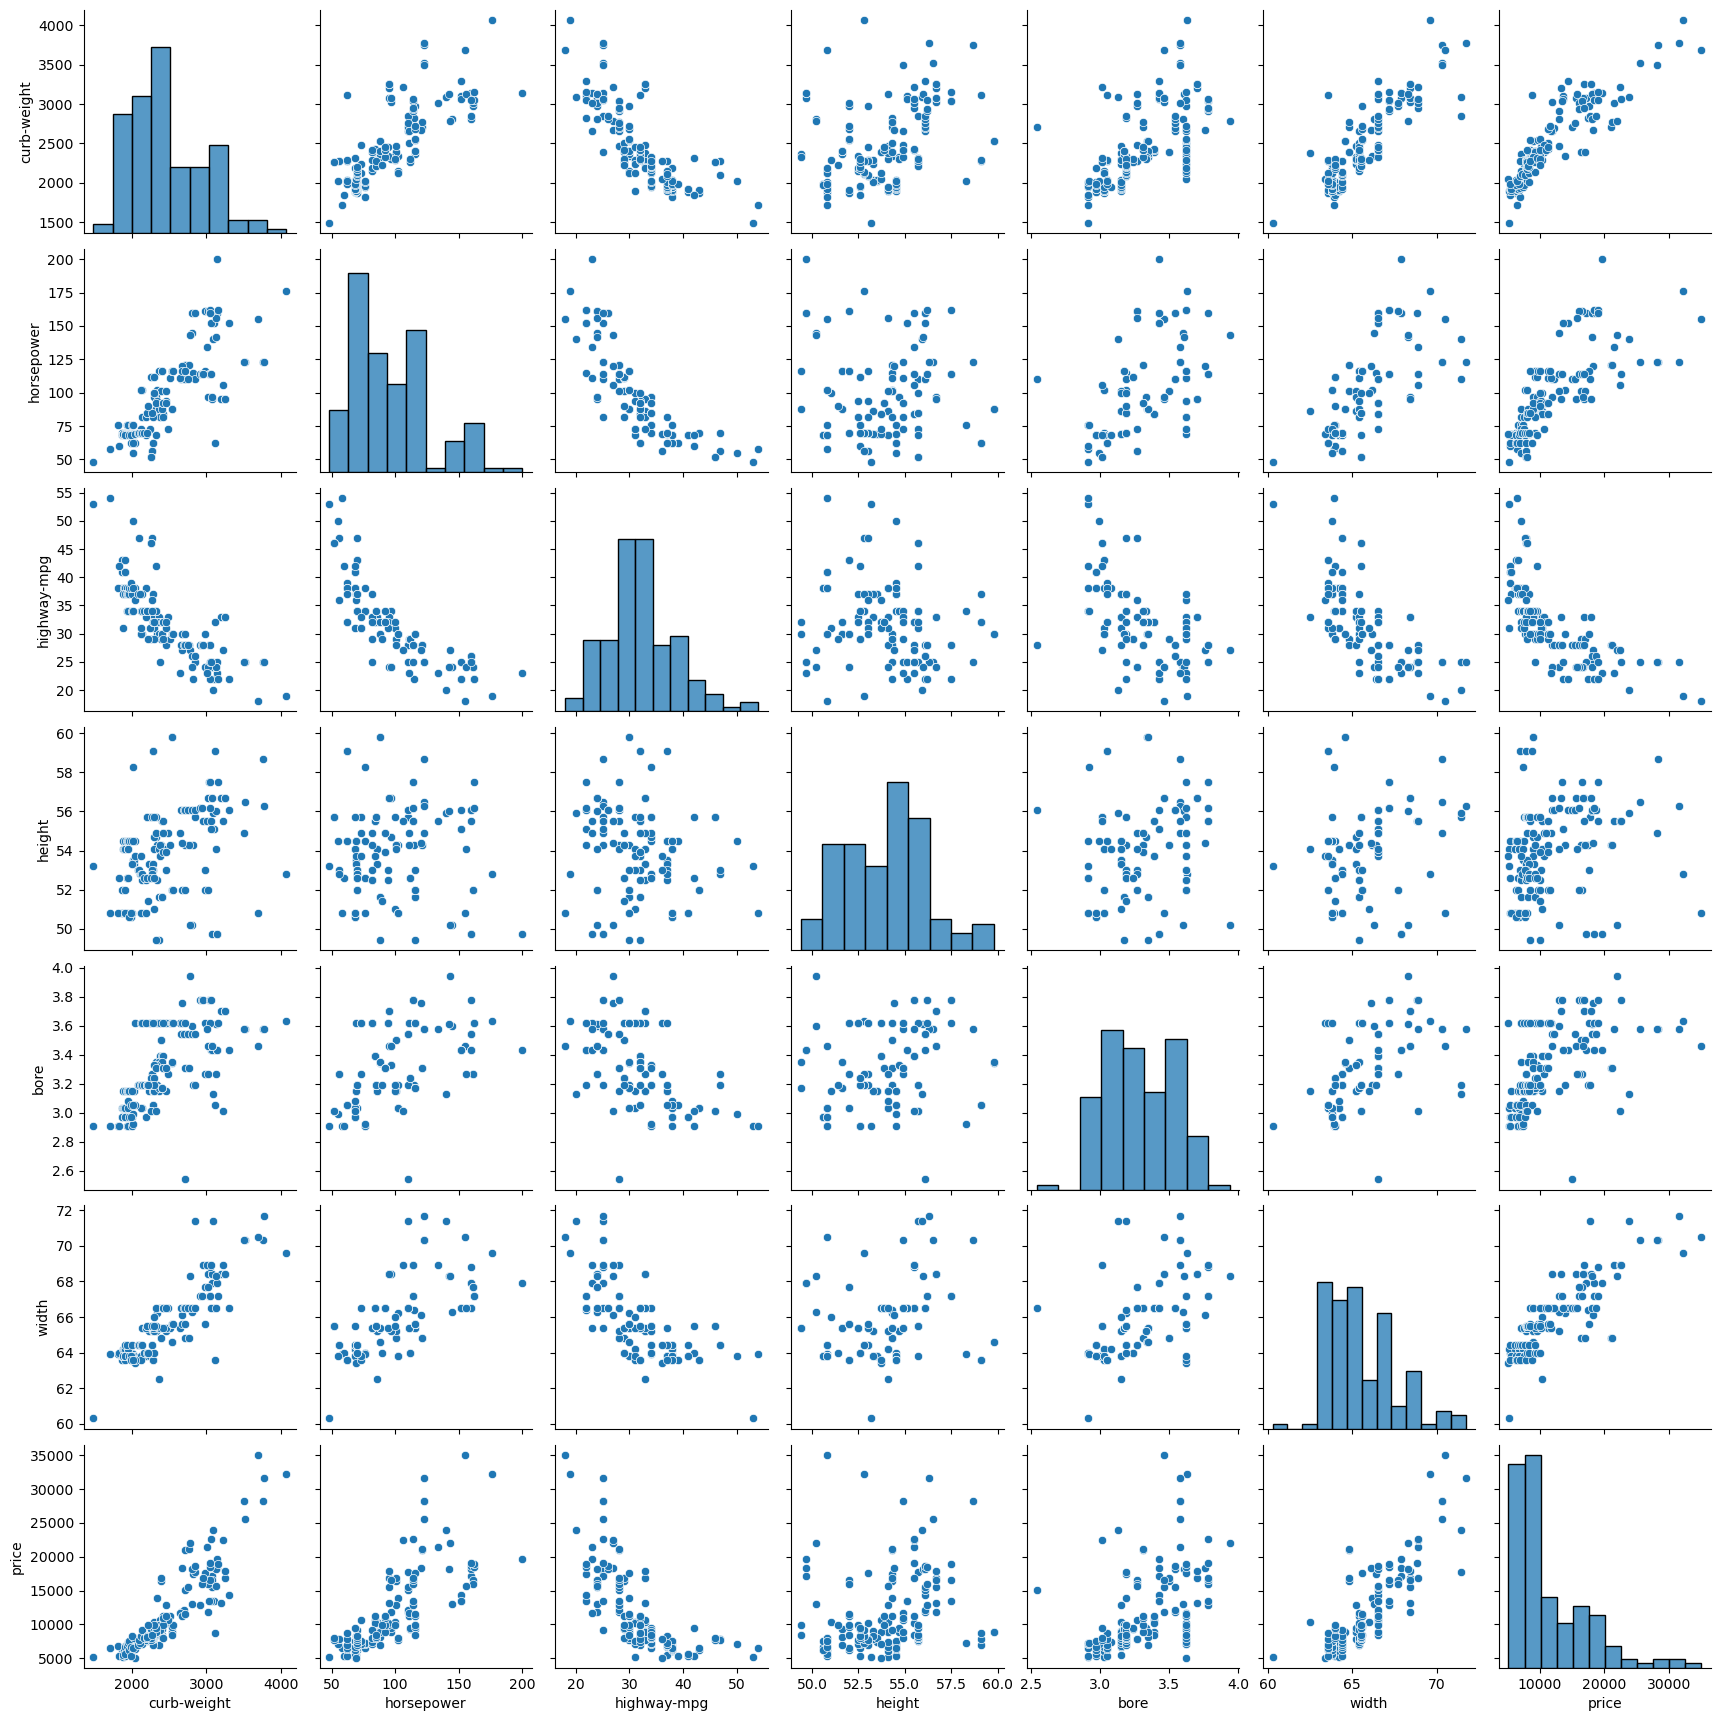

In [12]:
sns.pairplot(df[['curb-weight', 'horsepower', 'highway-mpg', 'height', 'bore', 'width', 'price']]);

>We easily observe the variables with a relationship that is similar to a linear relationship with the variable `Price' '.<br> 
>For example, the attribute `height' 'has no linear relationship with` price' '.<br>
> The information obtained here joins the results of the correlation matrix displayed above and allows us to consider a list of significant variables sufficient for the regression model.

*** (o)** Create a list **'Sign_Features'** which contains the names of the variables `' Curb-Weight' ',`' 'Horsepower'', `'bore'',` '' Width'`.


In [13]:
signif_features = ['curb-weight', 'horsepower', 'bore', 'width']

<hr style="border-width:2px;border-color:#75DFC1">
<center><h3>Refined model</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">

*** (A)** Create a regression model **LR2** and lead it only with the variables **Significant** of x_train.


In [14]:
lr2 = LinearRegression()
lr2.fit(X_train[signif_features], y_train)

LinearRegression()

*** (b)** Show the model (R²) of the model on the drive sample used.


In [15]:
lr2.score(X_train[signif_features], y_train)

0.8307793322048262

*** (C)** Show the model (R²) of the model on the variables **Significant** of the test sample.


In [16]:
lr2.score(X_test[signif_features], y_test)

0.8149045362821601

>The selection of variables made it possible to reduce the over-fitting (over-learning), that is to say the difference between the score obtained on the learning sample and the test sample. The model is more consistent and more ** robust **.<br>
> In addition, it provides better results on the test sample, and requires only 4 explanatory attributes against 15 in the previous model.
>
> Other methods can be used in *** Scikit-Learn*** for the selection of variables from the relationship between variables or their importance in the model.
>
>The function [** `selectkbest` **] (http://scikit-learn.org/stable/modles/generated/sklearn.feATURE_SELECTE.SELECTKBEST.HTML#SKLEARN.FEATURE_SELECTION.SELECTKBEST) of*Sklearn.feature_selection* Database and a target variable, ** K ** the most significant variables compared to a score function used, for example the ** `F_Regression '** function.<br>
>
> The function [**`F_Regression`**] (http://scikit-learn.org/stable/Modules/GeNeRared/Sklearn.feATURE_SELECTION.F_Regression.html#SKLEARN.FEATURE_SELECTION.F_REGRESS Statistics associated with the significance test of this attribute compared to the target variable, as well as the associated P-Value.

*** (D)** Import the two functions mentioned above.


*** (e)** Create a selector **SK** thanks to the function **`selectkbest`**, using the results of the function **` f_regression`** and a number of variables **k = 3**.


*** (f)** Adjust the selector **SK** to the paintings **Data** and **Target**, thanks to the method **`Fit`**.


*** (g)** Show the names of the **data** columns selected by the selector, thanks to the **Get_support** method which returns the Boolean `` True '' 'for each selected column of the data game and `` false' 'for others.


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression, k=3)

sk.fit(X=data, y=target)

data.columns[sk.get_support()]

Index(['width', 'curb-weight', 'engine-size'], dtype='object')

> Note that the 3 selected variables are the most correlated variables to the variable `Price' '.

*** (H)** Use the Method **`Transform`** of the selector **SK** To create the tables **SK_TRAIN** and **SK_TEST** from **` x_train`** and **`x_test`**.


In [18]:
sk_train = sk.transform(X_train)
sk_test = sk.transform(X_test)

*** (i)** Create a linear regression model from **`SK_TRAIN`** and **` y_Train`**.


*** (j)** Show the model of the model on the training sample as well as on **`SK_Test`**.


In [19]:
sklr = LinearRegression()
sklr.fit(sk_train, y_train)

print(sklr.score(sk_train, y_train))
print(sklr.score(sk_test, y_test))

0.8225867308188995
0.8278053815806942


> The model obtains good performance, both on the train sample and the test sample.
And this, with only the 3 most significant variables (even if they are correlated).
>
>The function [** `selectfrommodel` **] (http://scikit-learn.org/stable/modles/generated/sklearn.feATURE_SELECTE.SELECTFROMMODEL.HTML) allows you to select the important variables of a dataframe, from a created model with a or `feature_mportances'.<br>
> The model can already be 'adjusted' or not.


*** (K)** Import the class `selectfrommodel '.


*** (l)** Install a linear regression model **`Lr '**.


*** (m)** Create a selector **`Sfm`** Instance of the class` selectfrommodel ``, from the model **`Lr`** created.


*** (n)** Create the normalized tables **`x_train_scaled`** and **` x_test_Scaled`**, from **`x_train`** and **` x_test`**.
> *NB*: Standardization is compulsory when using the coefficients of a regression model, if the variables are not of the same order.


*** (o)** Save the columns of **`x_Train_Scaled`** selected by SFM in **` sfm_train`** and those of **`x_test_Scaled`** in **` sfm_test`**, thanks to the `transforming method.


In [20]:
from sklearn.feature_selection import SelectFromModel

lr = LinearRegression()

sfm = SelectFromModel(lr)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)

sfm_test = sfm.transform(X_test_scaled)

*** (p)** Show the names of the columns selected by **`Sfm`** thanks to the` Get_support` method.


In [21]:
data.columns[sfm.get_support()]

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size',
       'horsepower'],
      dtype='object')

*** (Q)** Create a model from the selected variables and display the model of the model on the drive and test samples.


In [22]:
sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))

0.8411863286188179
0.8038560780741798
